In [106]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [107]:
file_1='./dataset/附件1.xlsx'
file_2='./dataset/附件2.xlsx'
file_3='./dataset/附件3.xlsx'
file_4='./dataset/附件4.xlsx'

raw_data_1=pd.read_excel(file_1)
raw_data_2=pd.read_excel(file_2)
raw_data_3=pd.read_excel(file_3)
raw_data_41=pd.read_excel(file_4,sheet_name='平均损耗率(%)_小分类编码_不同值')
raw_data_42=pd.read_excel(file_4,sheet_name='Sheet1')

In [108]:
merged_data=pd.merge(raw_data_2,raw_data_1,on='单品编码',how='left')

In [109]:
from scipy.stats import skew, kurtosis

# 按分类编码和销售日期分组并计算销量的总和
merged_data['销量(日)']=merged_data.groupby(['分类编码','销售日期'])['销量(千克)'].transform('sum')

# 按分类编码分组并计算销量的统计量
sales_stats_by_category=merged_data.groupby('分类名称')['销量(日)'].agg(['mean','std','max','min',skew,kurtosis,'count'])
sales_stats_by_category['cv']=sales_stats_by_category['std']/sales_stats_by_category['mean']

# 重命名列名
sales_stats_by_category.columns=['平均值','标准差','最大值','最小值','偏度','峰度','样本数','变异系数']

# 打印结果
display(sales_stats_by_category)

,平均值,标准差,最大值,最小值,偏度,峰度,样本数,变异系数
分类名称,,,,,,,,
水生根茎类,57.291996,44.744982,296.792,0.926,2.428214,8.226647,58647,0.780999
花叶类,209.733011,111.795353,1265.473,31.298,4.460824,35.455021,331968,0.533037
花菜类,50.804023,27.373310,186.155,0.632,1.464128,3.279982,86570,0.538802
茄类,28.389356,16.422716,118.931,0.252,1.771512,5.036919,44898,0.578481
辣椒类,105.360092,82.153280,604.231,6.066,3.132487,12.361039,207996,0.779738
食用菌,94.515850,71.873085,511.136,3.012,2.911611,11.500353,148424,0.760434


In [110]:
from scipy.stats import skew, kurtosis

# 按分类编码和销售日期分组并计算销量的总和
merged_data['销量(日)']=merged_data.groupby(['分类编码','销售日期'])['销量(千克)'].transform('sum')

# 按分类编码分组并计算销量的统计量
sales_stats_by_item=merged_data.groupby('单品名称')['销量(日)'].agg(['mean','std','max','min',skew,kurtosis,'count'])
sales_stats_by_item['cv']=sales_stats_by_item['std']/sales_stats_by_item['mean']

# 重命名列名
sales_stats_by_item.columns=['平均值','标准差','最大值','最小值','偏度','峰度','样本数','变异系数']

# 打印结果
display(sales_stats_by_item)

,平均值,标准差,最大值,最小值,偏度,峰度,样本数,变异系数
单品名称,,,,,,,,
七彩椒(1),141.899440,160.610825,604.231,28.906,1.978195,2.552633,861,1.131864
七彩椒(2),125.877979,57.891468,604.231,38.664,2.438535,13.718564,1058,0.459901
七彩椒(份),164.400111,130.107884,403.185,55.990,0.944466,-0.973289,18,0.791410
上海青,192.809731,63.572302,499.848,38.008,0.647649,1.884884,16644,0.329715
上海青(份),303.908731,222.514554,1265.473,40.471,3.034424,10.651311,3071,0.732176
...,...,...,...,...,...,...,...,...
黑牛肝菌,53.353000,15.505863,71.953,33.987,-0.085495,-0.998375,4,0.290628
黑牛肝菌(盒),59.512000,34.024191,88.954,28.395,-0.004843,-1.993545,4,0.571720
黑皮鸡枞菌,113.167771,39.579374,197.615,49.058,0.081266,-1.037055,35,0.349741


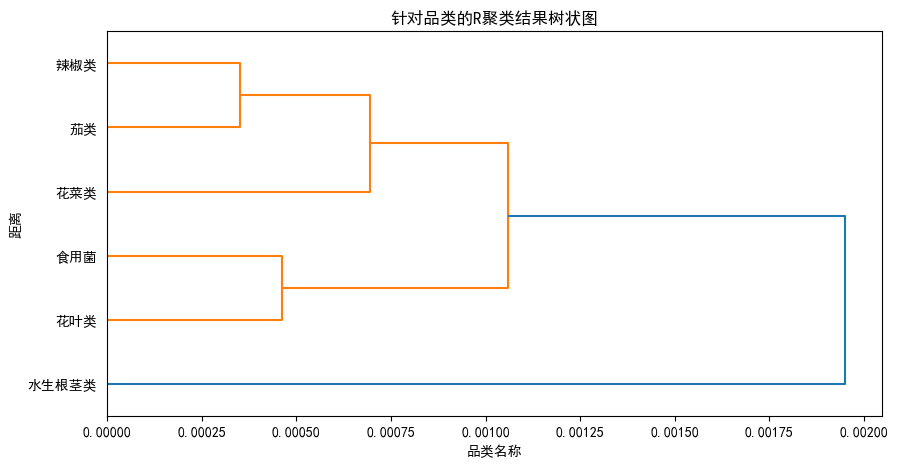

,平均值,标准差,最大值,最小值,偏度,峰度,样本数,变异系数,聚类结果
分类名称,,,,,,,,,
水生根茎类,57.291996,44.744982,296.792,0.926,2.428214,8.226647,58647.0,0.780999,1
花叶类,209.733011,111.795353,1265.473,31.298,4.460824,35.455021,331968.0,0.533037,2
花菜类,50.804023,27.373310,186.155,0.632,1.464128,3.279982,86570.0,0.538802,0
茄类,28.389356,16.422716,118.931,0.252,1.771512,5.036919,44898.0,0.578481,0
辣椒类,105.360092,82.153280,604.231,6.066,3.132487,12.361039,207996.0,0.779738,0
食用菌,94.515850,71.873085,511.136,3.012,2.911611,11.500353,148424.0,0.760434,2


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
pd.set_option('expand_frame_repr',False) 
pd.set_option('display.unicode.ambiguous_as_wide',True)
pd.set_option('display.unicode.east_asian_width',True)
np.set_printoptions(suppress=True)

# 读取数据
data = pd.read_excel('./export/问题1_品类.xlsx', index_col=0).dropna().T
# 计算距离矩阵
distance_matrix = np.sqrt((1 - data.corr()) / 2)

# R型聚类分析
agg = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average')
agg.fit(distance_matrix)

# 计算链接矩阵
linkage_matrix = linkage(distance_matrix, method='average')

# 绘制树状图
plt.figure(figsize=(10,5))
dendrogram(linkage_matrix, labels=distance_matrix.columns, leaf_font_size=10,orientation='right')
plt.title('针对品类的R聚类结果树状图')
plt.xlabel('品类名称')
plt.ylabel('距离')
plt.show()

# 将聚类结果添加到原始数据中
data=data.T
data['聚类结果'] = agg.labels_

# 打印结果
display(data)

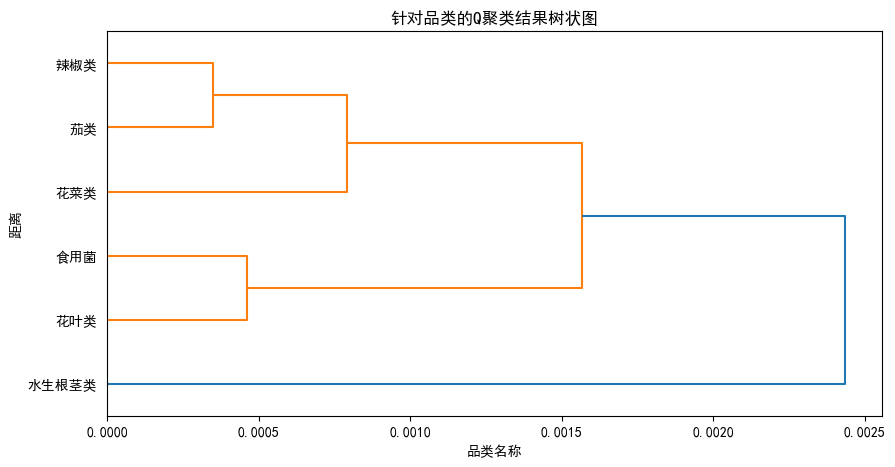

,平均值,标准差,最大值,最小值,偏度,峰度,样本数,变异系数,聚类结果
分类名称,,,,,,,,,
水生根茎类,57.291996,44.744982,296.792,0.926,2.428214,8.226647,58647.0,0.780999,1
花叶类,209.733011,111.795353,1265.473,31.298,4.460824,35.455021,331968.0,0.533037,2
花菜类,50.804023,27.373310,186.155,0.632,1.464128,3.279982,86570.0,0.538802,0
茄类,28.389356,16.422716,118.931,0.252,1.771512,5.036919,44898.0,0.578481,0
辣椒类,105.360092,82.153280,604.231,6.066,3.132487,12.361039,207996.0,0.779738,0
食用菌,94.515850,71.873085,511.136,3.012,2.911611,11.500353,148424.0,0.760434,2


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
pd.set_option('expand_frame_repr',False) 
pd.set_option('display.unicode.ambiguous_as_wide',True)
pd.set_option('display.unicode.east_asian_width',True)
np.set_printoptions(suppress=True)

# 读取数据
data = pd.read_excel('./export/问题1_品类.xlsx', index_col=0).dropna().T
# 计算距离矩阵
distance_matrix = np.sqrt((1 - data.corr()) / 2)

# Q型聚类分析
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit(distance_matrix)

# 计算链接矩阵
linkage_matrix = linkage(distance_matrix, method='ward')

# 绘制树状图
plt.figure(figsize=(10,5))
dendrogram(linkage_matrix, labels=distance_matrix.columns, leaf_font_size=10,orientation='right')
plt.title('针对品类的Q聚类结果树状图')
plt.xlabel('品类名称')
plt.ylabel('距离')
plt.show()

# 将聚类结果添加到原始数据中
data=data.T
data['聚类结果'] = agg.labels_

# 打印结果
display(data)

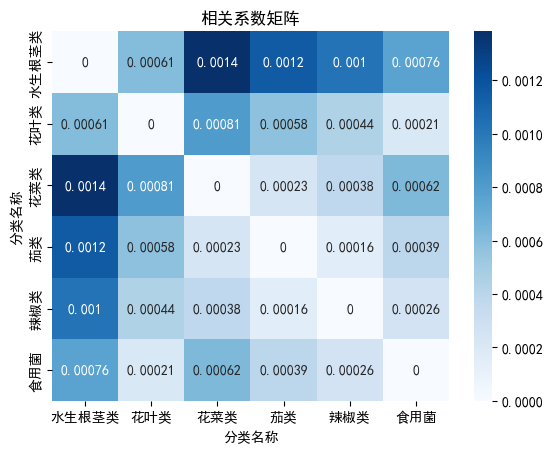

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制热力图
sns.heatmap(distance_matrix, annot=True, cmap='Blues')

# 添加标题和标签
plt.title('相关系数矩阵')
plt.xlabel('分类名称')
plt.ylabel('分类名称')

# 显示图形
plt.show()

In [114]:
import pandas as pd

# 读取数据表
df = pd.read_excel('./export/问题1_单品.xlsx', index_col='单品名称')

# 数据清理
df = df.dropna()

# 选择一个母序列和子序列
mother_series = df.loc[df['平均值'].idxmax()]
child_series = df.drop(df['平均值'].idxmax())

def grey_correlation(series_x, series_y, rho=0.5):
    """
    计算灰色关联度
    series_x: 母序列
    series_y: 子序列
    rho: 解析系数, 一般取0.5
    """
    min_diff = abs(series_x - series_y).min()
    max_diff = abs(series_x - series_y).max()

    return (min_diff + rho * max_diff) / (abs(series_x - series_y) + rho * max_diff)

# 逐一计算子序列与母序列的灰色关联度
results = []
for index, row in child_series.iterrows():
    correlation = grey_correlation(mother_series, row)
    results.append(correlation.mean())

# 将结果添加到原始数据表
child_series['灰色关联度'] = results

In [115]:
mother_series

平均值       536.908812
标准差       479.248236
最大值      1265.473000
最小值        83.973000
偏度           0.762707
峰度          -1.273523
样本数       240.000000
变异系数       0.892606
Name: 黑油菜, dtype: float64

In [116]:
child_series[['灰色关联度']].to_excel('./export/问题1_单品_灰色关联度.xlsx')

In [117]:
raw_data_3

,日期,单品编码,批发价格(元/千克)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [118]:
merged_data = merged_data.rename(columns={'销售日期': '日期'})
merged_data=pd.merge(merged_data,raw_data_3,on=['日期', '单品编码'],how='left')
merged_data=pd.merge(merged_data,raw_data_42[['单品编码','损耗率(%)']],on='单品编码',how='left')
merged_data=pd.merge(merged_data,raw_data_41[['分类编码','平均损耗率(%)_小分类编码_不同值']],on='分类编码',how='left')

In [119]:
# 筛选符合条件的行
condition = ((merged_data['日期'].dt.year.isin([2020, 2021, 2022])) & 
             (merged_data['日期'].dt.month == 7) & 
             (merged_data['日期'].dt.day.isin(range(1, 8))))
filtered_data = merged_data.loc[condition]

filtered_data.to_excel('./export/问题2_234合并表_日期筛选.xlsx')

In [120]:
filtered_data

,日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品名称,分类编码,分类名称,销量(日),批发价格(元/千克),损耗率(%),平均损耗率(%)_小分类编码_不同值
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,76.715,4.32,7.08,9.24
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否,大白菜,1011010101,花叶类,205.402,2.10,22.27,12.83
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,76.715,4.32,7.08,9.24
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否,上海青,1011010101,花叶类,205.402,7.03,14.43,12.83
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否,菜心,1011010101,花叶类,205.402,4.60,13.70,12.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598541,2022-07-07,21:38:24.717,102900005116257,0.302,8.0,销售,否,紫茄子(2),1011010501,茄类,14.602,4.49,6.07,6.68
598542,2022-07-07,21:38:50.412,102900005116257,0.616,8.0,销售,否,紫茄子(2),1011010501,茄类,14.602,4.49,6.07,6.68
598543,2022-07-07,21:46:43.889,102900011034330,1.000,3.4,销售,是,双孢菇(盒),1011010801,食用菌,29.189,3.00,0.20,9.45
598544,2022-07-07,22:07:12.408,102900005116530,0.136,17.6,销售,是,西峡香菇(1),1011010801,食用菌,29.189,13.60,13.82,9.45


In [121]:
merged_data.columns

Index(['日期', '扫码销售时间', '单品编码', '销量(千克)', '销售单价(元/千克)',
       '销售类型', '是否打折销售', '单品名称', '分类编码', '分类名称',
       '销量(日)', '批发价格(元/千克)', '损耗率(%)',
       '平均损耗率(%)_小分类编码_不同值'],
      dtype='object')

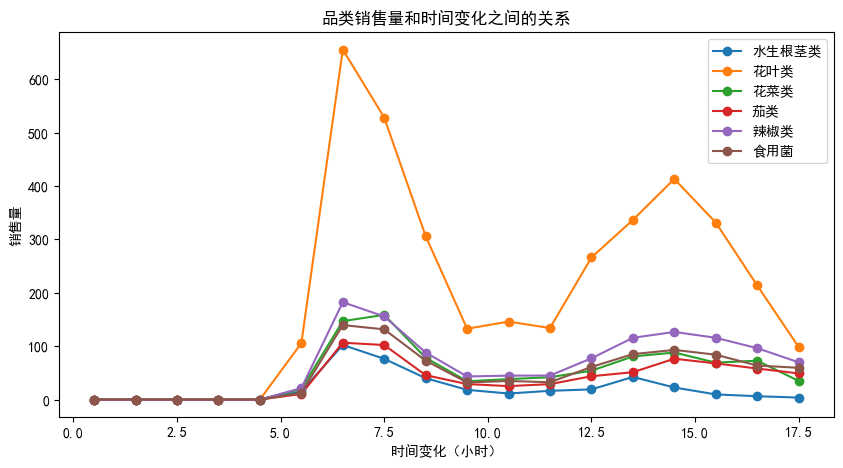

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算品类销售量
sales_data=filtered_data.groupby(['分类名称'])['销量(千克)'].sum().reset_index()

# 计算时间变化
time_data=pd.to_datetime(filtered_data['扫码销售时间'])-pd.to_datetime('03:30:00')
time_data=time_data.dt.total_seconds() / 3600

# 将时间变化分成不同的时间段
time_bins = pd.cut(time_data, bins=range(0, int(time_data.max()) + 1))

# 计算每个时间段内的销售量
sales_data = filtered_data.groupby([time_bins, '分类名称'])['销量(千克)'].sum().reset_index()

# 将时间段的中间值转换为数值类型
sales_data['扫码销售时间'] = sales_data['扫码销售时间'].apply(lambda x: x.mid).astype(float)

# 绘制折线图
plt.figure(figsize=(10,5))
for category, group in sales_data.groupby('分类名称'):
    plt.plot(group['扫码销售时间'], group['销量(千克)'], marker='o', label=category)
plt.xlabel('时间变化（小时）')
plt.ylabel('销售量')
plt.title('品类销售量和时间变化之间的关系')
plt.legend()
plt.show()

In [123]:
import pandas as pd

# 将扫码销售时间转换为日期时间格式
filtered_data['扫码销售时间'] = pd.to_datetime(filtered_data['扫码销售时间'])

# 判断是否有打折销售
discount_data = filtered_data[filtered_data['是否打折销售'] == '是']

# 将时间分成不同的时间段
time_bins = pd.cut(discount_data['扫码销售时间'].dt.hour, bins=range(0, 25, 2))

# 计算每个时间段内的打折销售数量和不打折销售数量
discount_count = discount_data.groupby(time_bins)['销售单价(元/千克)'].mean()
total_count = filtered_data.groupby(time_bins)['销售单价(元/千克)'].mean()

# 计算打折销售单价和不打折销售单价的变化比率
discount_ratio = (total_count - discount_count) / total_count

# 打印结果
result = pd.concat([discount_count, total_count, discount_ratio], axis=1)
result.columns = ['打折平均售价', '不打折平均售价', '打折力度']
display(pd.DataFrame(result))

,打折平均售价,不打折平均售价,打折力度
扫码销售时间,,,
"(0, 2]",NaN,NaN,NaN
"(2, 4]",NaN,NaN,NaN
"(4, 6]",NaN,NaN,NaN
"(6, 8]",NaN,NaN,NaN
"(8, 10]",15.862338,15.862338,0.0
"(10, 12]",15.360000,15.360000,0.0
"(12, 14]",13.976923,13.976923,0.0
"(14, 16]",16.248837,16.248837,0.0
"(16, 18]",11.036782,11.036782,0.0


In [124]:
condition2 = ((merged_data['日期'].dt.year.isin([2020,2021,2022])) & 
             (merged_data['日期'].dt.month == 7) & 
             (merged_data['日期'].dt.day.isin(range(1,8))))
foliage_2_data=merged_data[(merged_data['分类名称']=='花叶类')&condition2]

In [125]:
foliage_2_data[(foliage_2_data['日期'].dt.year==2020)&
               (merged_data['日期'].dt.day==1)]

,日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品名称,分类编码,分类名称,销量(日),批发价格(元/千克),损耗率(%),平均损耗率(%)_小分类编码_不同值
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否,大白菜,1011010101,花叶类,205.402,2.10,22.27,12.83
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否,上海青,1011010101,花叶类,205.402,7.03,14.43,12.83
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否,菜心,1011010101,花叶类,205.402,4.60,13.70,12.83
6,2020-07-01,09:21:56.536,102900005115779,0.338,8.0,销售,否,云南生菜,1011010101,花叶类,205.402,6.72,15.25,12.83
8,2020-07-01,09:22:01.476,102900005115779,0.213,8.0,销售,否,云南生菜,1011010101,花叶类,205.402,6.72,15.25,12.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2020-07-01,20:32:34.359,102900005118831,1.000,6.9,销售,否,娃娃菜,1011010101,花叶类,205.402,4.13,2.48,12.83
964,2020-07-01,20:40:42.010,102900005118831,1.000,6.9,销售,否,娃娃菜,1011010101,花叶类,205.402,4.13,2.48,12.83
979,2020-07-01,20:54:09.551,102900005118831,1.000,6.9,销售,否,娃娃菜,1011010101,花叶类,205.402,4.13,2.48,12.83
993,2020-07-01,21:11:44.203,102900005116790,0.689,8.0,销售,否,黄心菜(1),1011010101,花叶类,205.402,3.97,10.64,12.83


In [129]:
#merged_data_bak=merged_data.copy()

In [139]:
merged_data=merged_data_bak.copy()

In [ ]:
# 将日期列转换为datetime类型并设置为索引
merged_data['日期'] = pd.to_datetime(merged_data['日期'])
merged_data.set_index('日期', inplace=True)

# 选择7月1日到7月7日的数据并按单品名称或分类名称分组
grouped = merged_data.loc['2021-07-01':'2021-07-07'].groupby('单品名称')

# 计算每个组的销量总和并按降序排序
sales_by_item = grouped['销量(千克)'].agg('sum').sort_values(ascending=False)
print('往年7.1-7.7最畅销的单品：\n', sales_by_item.head())

# 按分类名称分组并计算每个组的销量总和
grouped = merged_data.loc['2021-07-01':'2021-07-07'].groupby('分类名称')
sales_by_category = grouped['销量(千克)'].agg('sum').sort_values(ascending=False)
print('往年7.1-7.7最畅销的品类：\n', sales_by_category.head())

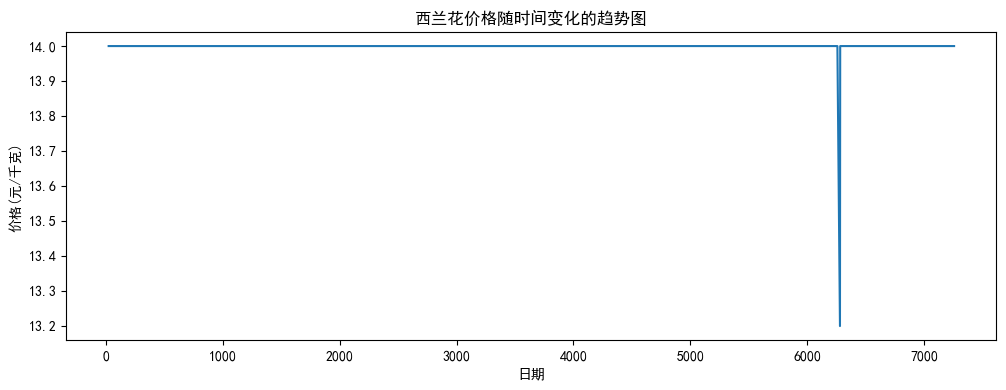

In [142]:
condition2 = ((merged_data['日期'].dt.year.isin([2020])) & 
             (merged_data['日期'].dt.month == 7) & 
             (merged_data['日期'].dt.day.isin(range(1,8))))

# 选择特定的单品或品类并绘制价格随时间变化的趋势图
item_name = '西兰花'
plt.figure(figsize=(12,4))
plt.plot(merged_data.loc[(merged_data['单品名称'] == item_name)&condition2, '销售单价(元/千克)'])
plt.title(f'{item_name}价格随时间变化的趋势图')
plt.xlabel('日期')
plt.ylabel('价格(元/千克)')
plt.show()

In [143]:
merged_data.loc[(merged_data['单品名称'] == item_name)&condition2, '销售单价(元/千克)']

25      14.0
47      14.0
54      14.0
66      14.0
79      14.0
        ... 
7225    14.0
7229    14.0
7234    14.0
7248    14.0
7255    14.0
Name: 销售单价(元/千克), Length: 487, dtype: float64